In [ ]:
import os
import time

RAND_SEED = 12345
import numpy as np
np.random.seed(RAND_SEED)
import random
random.seed(RAND_SEED)
import pandas as pd

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor as MLP

In [ ]:
def model(X, y, VariableName='Y'):

    print("*"*40)
    print("Training:", VariableName)
    print("*"*40)

    # Scale Data
    scaler_X = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    scaler_y = MinMaxScaler()
    y_scaled = scaler_y.fit_transform(y)

    # split data set
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                        test_size=0.25, random_state=12345)

    # fit model
    t = time.time()
    model_MLP = MLP(hidden_layer_sizes = (100, 50, ),
                activation = "relu",
                solver = 'adam',
                alpha = 0.001,
                batch_size = 200,
                learning_rate ='adaptive',
                learning_rate_init = 0.01,
                random_state=12345,
                power_t = 0.5,
                max_iter =1000,
                shuffle =True,
                tol = 1e-6,
                verbose = False,
                warm_start = False,
                momentum = 0.9,
                nesterovs_momentum =True,
                early_stopping = True,
                validation_fraction = 0.5,
                beta_1 = 0.999,
                beta_2 = 0.9999,
                epsilon = 1e-8,
                n_iter_no_change=100).fit(X_train, y_train)

    dt = time.time() - t
    No_iter = model_MLP.n_iter_

    # Predict for blind test and train input features
    y_pred_train = model_MLP.predict(X_train)
    y_pred_test  = model_MLP.predict(X_test)
    y_pred = model_MLP.predict(X_scaled)

    # Compute  r2 scores
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    r2 = r2_score(y, y_pred)
    R2_Scores=[r2_train, r2_test, r2]

    # Alternatively, model score and model Loss is computed using MLP function
    Model_Score = model_MLP.score(X, y)
    Model_Loss = model_MLP.loss_

    # Save to Results File
    #PrintOutput(VariableName, R2_Scores, Model_Score, Model_Loss, No_iter, dt)

    # print to screen
    print("Train R^2: %f" %r2_train)
    print("Test  R^2: %f" %r2_test)
    print("All   R^2: %f" %r2)
    print("Train Data Model score: %f" % model_MLP.score(X_train, y_train))
    print("Test  Data Model score: %f" % model_MLP.score(X_test, y_test))
    print("All   Data Model score: %f" % Model_Score)
    print("Overall    Model loss : %f" % Model_Loss)
    print("No. iterations reached: %f" % No_iter)
    print("Model Solved in {}".format(dt) + " secs")

    # Rescale Data (Inverse Transform)
    y_train_inverse = scaler_y.inverse_transform(y_train)
    y_test_inverse = scaler_y.inverse_transform(y_test)

    y_pred_train_inverse = scaler_y.inverse_transform(np.array(y_pred_train).reshape(-1,1))
    y_pred_test_inverse = scaler_y.inverse_transform(np.array(y_pred_test).reshape(-1,1))

    y_pred_inverse = scaler_y.inverse_transform(np.array(y_pred).reshape(-1,1))


    global ResultsFolder

    # plot learning curve for the model
    fig = plt.figure(figsize=(6,6))
    plt.plot(pd.DataFrame(model_MLP.loss_curve_))
    plt.title('Model Loss - {}'.format(VariableName))
    plt.yscale("log")
    plt.show()
    fig.savefig(os.path.join(ResultsFolder, '{}_Model_Loss.png'.format(VariableName)),
                bbox_inches='tight', dpi=300)

    # make a cross plot of predicted and actual values
    fig = plt.figure(figsize=(6,6))
    plt.scatter(y_train_inverse, y_pred_train_inverse, c="blue", label="Train")
    plt.scatter(y_test_inverse, y_pred_test_inverse, c="red", label="Test")
    plt.title('Actual vs Predicted - {}'.format(VariableName))
    plt.xlabel('Actual Data')
    plt.ylabel('Model Predicted')
    plt.legend()
    plt.show()
    fig.savefig(os.path.join(ResultsFolder, '{}_Actual_vs_Predicted.png'.format(VariableName)),
                bbox_inches='tight', dpi=300)

    return y_pred_inverse

In [ ]:
def PrintOutput(VariableName, R2_Scores, Model_Score, Model_Loss, n_iter, dt):

    global ResultsFolder
    global ResultsFile

    with open(ResultsFile, 'a') as f:
        f.write('{}, {}, {}, {}, {}, {}, {}, {} \n'.format(VariableName, R2_Scores[0], R2_Scores[1], R2_Scores[2], Model_Score, Model_Loss, n_iter, dt))

In [ ]:
import gdown

url = ' https://drive.google.com/uc?id=1UiNqo6hDNxDFlaC5oSH-02kDaw9PBZuo'

InputDataFile = 'Well_Choke_GL.csv'

gdown.download(url, InputDataFile, quiet=False)

data = pd.read_csv(InputDataFile)
print(data.head())

ResultsFolder = 'output'
os.makedirs(ResultsFolder, exist_ok=True)

ResultsFile = os.path.join(ResultsFolder, 'R2_scores.csv')

Downloading...
From:  https://drive.google.com/uc?id=1UiNqo6hDNxDFlaC5oSH-02kDaw9PBZuo
To: /content/Well_Choke_GL.csv
100%|██████████| 1.69M/1.69M [00:00<00:00, 94.8MB/s]

   ID_Choke  Orifice_ID_gaslift  Qgaslift      CHP     WHP     WHT  TAmbient  \
0      2.28               0.341      0.34  4447.07  414.31  123.77     80.25   
1      1.73               0.339      1.31  3760.25  411.15  157.75     80.74   
2      2.05               0.291      1.51  3927.29  453.75  155.85     80.43   
3      1.07               0.285      0.65  3875.00  500.74  130.31     79.27   
4      1.04               0.322      0.03  3689.26  504.57   98.76     79.64   

      FBHP    FBHT     FLP     FLT  DP_Choke  DT_Choke  Qliquid   Qgas  \
0  4536.89  241.19  413.79  123.43      0.52      0.34  1480.21  0.186   
1  3781.06  237.73  388.15  157.47     23.00      0.27  5067.41  2.196   
2  3970.94  238.20  449.69  155.61      4.06      0.24  2893.18  0.158   
3  3909.54  238.81  482.36  130.09     18.38      0.22  2115.23  0.531   
4  3901.12  240.93  499.84   98.45      4.73      0.31  1240.98  0.621   

      Qoil   Qwater  PReservoir  PI_Liquid  PI_oil  
0   327.87  1152.34  

In [ ]:
# Read data
df = pd.read_csv(InputDataFile)

In [ ]:
# Create inputmatrix (X) and targets (y=VariableNames)
X = df[["ID_Choke", "Orifice_ID_gaslift", "Qgaslift", "CHP",
        "WHP", "WHT", "FBHP","FLP", "FLT", "DP_Choke", "DT_Choke"]]

VariableNames=["Qoil", "Qwater","Qgas"]

****************************************
Training: Qoil
****************************************


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Train R^2: 0.990434
Test  R^2: 0.989604
All   R^2: -2.121391
Train Data Model score: 0.990434
Test  Data Model score: 0.989604
All   Data Model score: -1.347436
Overall    Model loss : 0.000418
No. iterations reached: 923.000000
Model Solved in 44.2947142124176 secs


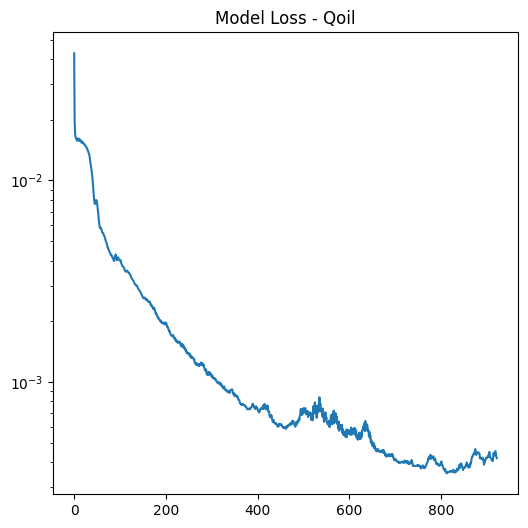

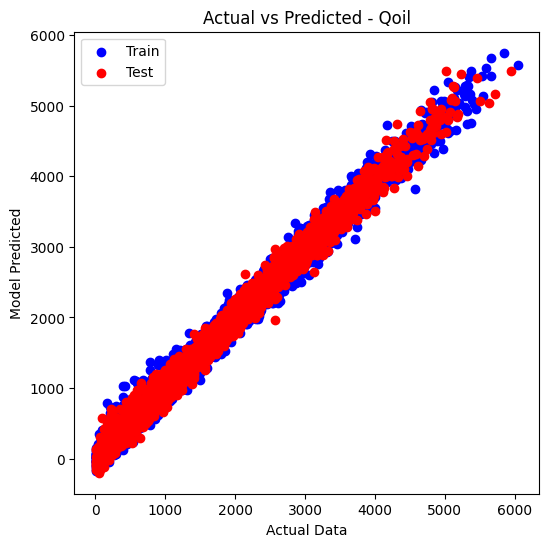

****************************************
Training: Qwater
****************************************


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Train R^2: 0.989660
Test  R^2: 0.989534
All   R^2: -2.357463
Train Data Model score: 0.989660
Test  Data Model score: 0.989534
All   Data Model score: -0.133453
Overall    Model loss : 0.000379
No. iterations reached: 640.000000
Model Solved in 32.28991746902466 secs


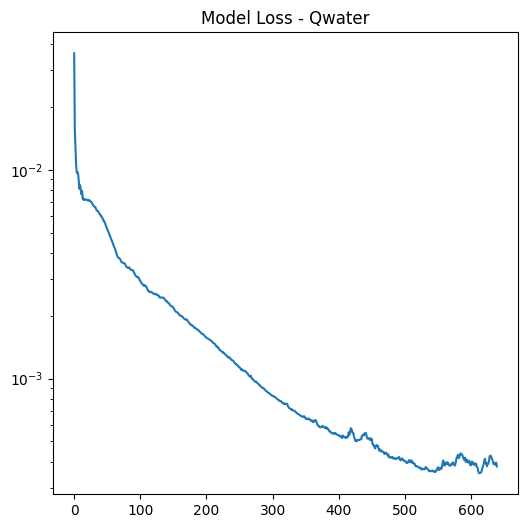

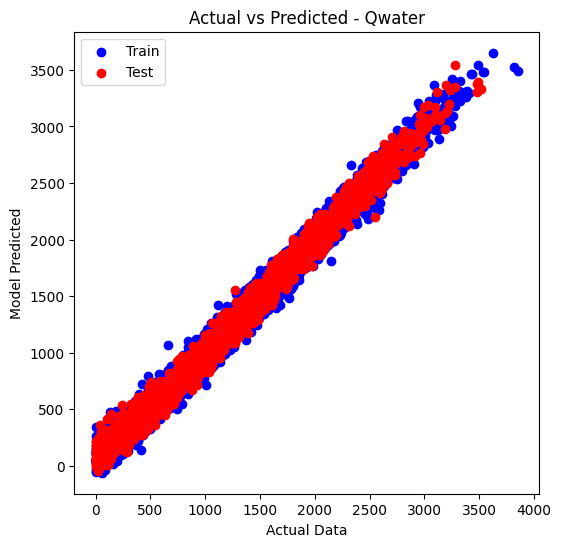

****************************************
Training: Qgas
****************************************


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Train R^2: 0.991522
Test  R^2: 0.991616
All   R^2: -0.507976
Train Data Model score: 0.991522
Test  Data Model score: 0.991616
All   Data Model score: -697841.528303
Overall    Model loss : 0.000357
No. iterations reached: 873.000000
Model Solved in 42.61845064163208 secs


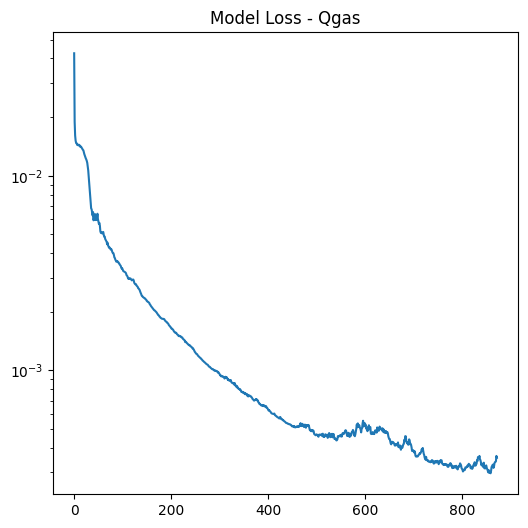

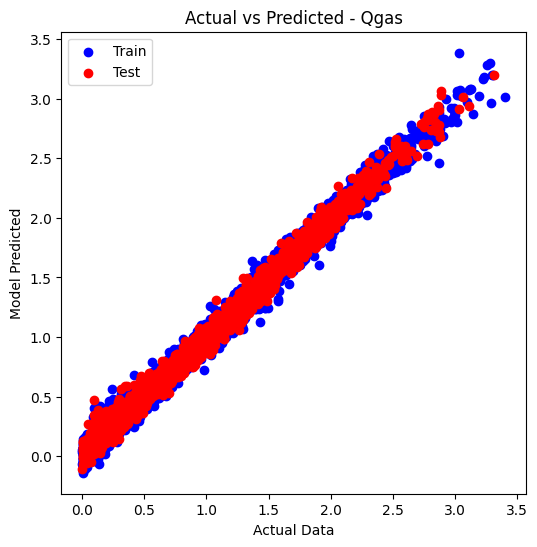

In [ ]:
for VariableName in VariableNames:
    y = np.array(df[[VariableName]].values)
    y_pred = model(X, y, VariableName)